<a href="https://colab.research.google.com/github/nhamct/Software-Requirement-Classification/blob/main/Software_Requirement_Classification_Vietnamese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bài toán:
Input: tập dữ liệu tiếng Việt <br>
Output: phân loại (yêu cầu chức năng, yêu cầu phi chức năng) <br>
Process: sử dụng bộ thư viện Scikitlearn để thực hiện các thuật toán học máy có giám sát:
*   Logistic Regression
*   Naive Bayes
*   Support Vector Machine
Nếu còn thời gian, thực hiện thuật toán Fasttext (https://fasttext.cc/) của Facebook
---


# Tiền xử lý


1.   Xóa HTML code(nếu có)
2.   Chuẩn hóa bảng mã UNICODE (đưa về UNICODE tổ hợp dựng sẵn)
3.   Chuẩn hóa kiểu gõ dấu tiếng Việt
4.   Tách từ tiếng Việt
5.   Đưa về văn bản viết thường
6. Xóa kí tự đặc biệt



In [1]:
!pip install underthesea


     |████████████████████████████████| 7.6 MB 8.1 MB/s 
     |████████████████████████████████| 235 kB 42.8 MB/s 
     |████████████████████████████████| 965 kB 45.6 MB/s 
     |████████████████████████████████| 581 kB 50.9 MB/s 


In [2]:
import regex as re
from underthesea import word_tokenize

In [3]:
uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"
 
def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
dicchar = loaddicchar()

# Hàm chuyển Unicode dựng sẵn về Unicde tổ hợp (phổ biến hơn)
def convert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

bang_nguyen_am = [['a', 'à', 'á', 'ả', 'ã', 'ạ', 'a'],
                  ['ă', 'ằ', 'ắ', 'ẳ', 'ẵ', 'ặ', 'aw'],
                  ['â', 'ầ', 'ấ', 'ẩ', 'ẫ', 'ậ', 'aa'],
                  ['e', 'è', 'é', 'ẻ', 'ẽ', 'ẹ', 'e'],
                  ['ê', 'ề', 'ế', 'ể', 'ễ', 'ệ', 'ee'],
                  ['i', 'ì', 'í', 'ỉ', 'ĩ', 'ị', 'i'],
                  ['o', 'ò', 'ó', 'ỏ', 'õ', 'ọ', 'o'],
                  ['ô', 'ồ', 'ố', 'ổ', 'ỗ', 'ộ', 'oo'],
                  ['ơ', 'ờ', 'ớ', 'ở', 'ỡ', 'ợ', 'ow'],
                  ['u', 'ù', 'ú', 'ủ', 'ũ', 'ụ', 'u'],
                  ['ư', 'ừ', 'ứ', 'ử', 'ữ', 'ự', 'uw'],
                  ['y', 'ỳ', 'ý', 'ỷ', 'ỹ', 'ỵ', 'y']]
bang_ky_tu_dau = ['', 'f', 's', 'r', 'x', 'j']

nguyen_am_to_ids = {}

for i in range(len(bang_nguyen_am)):
    for j in range(len(bang_nguyen_am[i]) - 1):
        nguyen_am_to_ids[bang_nguyen_am[i][j]] = (i, j)

def chuan_hoa_dau_tu_tieng_viet(word):
    if not is_valid_vietnam_word(word):
        return word

    chars = list(word)
    dau_cau = 0
    nguyen_am_index = []
    qu_or_gi = False
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x == -1:
            continue
        elif x == 9:  # check qu
            if index != 0 and chars[index - 1] == 'q':
                chars[index] = 'u'
                qu_or_gi = True
        elif x == 5:  # check gi
            if index != 0 and chars[index - 1] == 'g':
                chars[index] = 'i'
                qu_or_gi = True
        if y != 0:
            dau_cau = y
            chars[index] = bang_nguyen_am[x][0]
        if not qu_or_gi or index != 1:
            nguyen_am_index.append(index)
    if len(nguyen_am_index) < 2:
        if qu_or_gi:
            if len(chars) == 2:
                x, y = nguyen_am_to_ids.get(chars[1])
                chars[1] = bang_nguyen_am[x][dau_cau]
            else:
                x, y = nguyen_am_to_ids.get(chars[2], (-1, -1))
                if x != -1:
                    chars[2] = bang_nguyen_am[x][dau_cau]
                else:
                    chars[1] = bang_nguyen_am[5][dau_cau] if chars[1] == 'i' else bang_nguyen_am[9][dau_cau]
            return ''.join(chars)
        return word

    for index in nguyen_am_index:
        x, y = nguyen_am_to_ids[chars[index]]
        if x == 4 or x == 8:  # ê, ơ
            chars[index] = bang_nguyen_am[x][dau_cau]
            # for index2 in nguyen_am_index:
            #     if index2 != index:
            #         x, y = nguyen_am_to_ids[chars[index]]
            #         chars[index2] = bang_nguyen_am[x][0]
            return ''.join(chars)

    if len(nguyen_am_index) == 2:
        if nguyen_am_index[-1] == len(chars) - 1:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            chars[nguyen_am_index[0]] = bang_nguyen_am[x][dau_cau]
            # x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            # chars[nguyen_am_index[1]] = bang_nguyen_am[x][0]
        else:
            # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    else:
        # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
        # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
        x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
        chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
        # x, y = nguyen_am_to_ids[chars[nguyen_am_index[2]]]
        # chars[nguyen_am_index[2]] = bang_nguyen_am[x][0]
    return ''.join(chars)


def is_valid_vietnam_word(word):
    chars = list(word)
    nguyen_am_index = -1
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x != -1:
            if nguyen_am_index == -1:
                nguyen_am_index = index
            else:
                if index - nguyen_am_index != 1:
                    return False
                nguyen_am_index = index
    return True


def chuan_hoa_dau_cau_tieng_viet(sentence):
    """
        Chuyển câu tiếng việt về chuẩn gõ dấu kiểu cũ.
        :param sentence:
        :return:
        """
    sentence = sentence.lower()
    words = sentence.split()
    for index, word in enumerate(words):
        cw = re.sub(r'(^\p{P}*)([p{L}.]*\p{L}+)(\p{P}*$)', r'\1/\2/\3', word).split('/')
        # print(cw)
        if len(cw) == 3:
            cw[1] = chuan_hoa_dau_tu_tieng_viet(cw[1])
        words[index] = ''.join(cw)
    return ' '.join(words)

def remove_html(txt):
    return re.sub(r'<[^>]*>', '', txt)

In [4]:
def text_preprocess(document):
    # xóa html code
    document = remove_html(document)
    # chuẩn hóa unicode
    document = convert_unicode(document)
    # chuẩn hóa cách gõ dấu tiếng Việt
    document = chuan_hoa_dau_cau_tieng_viet(document)
    # tách từ
    document = word_tokenize(document, format="text")
    # đưa về lower
    document = document.lower()
    # xóa các ký tự không cần thiết
    document = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',document)
    # xóa khoảng trắng thừa
    document = re.sub(r'\s+', ' ', document).strip()
    return document

document = """
Tất cả các thiết bị của doanh nghiệp, được quản lý bằng cách tích hợp code (bar code/ QR code/ RFID,...) lưu trữ toàn bộ thông tin mã hóa của từng thiết bị, được ghi nhận ở các trạng thái Đang hoạt động/ Không hoạt động trên hệ thống. 
"""
document = text_preprocess(document)
print(document)

tất_cả các thiết_bị của doanh_nghiệp được quản_lý bằng cách tích_hợp code bar code qr code rfid lưu_trữ toàn_bộ thông_tin mã_hóa của từng thiết_bị được ghi_nhận ở các trạng_thái đang hoạt_động không hoạt_động trên hệ_thống


## PHÂN LOẠI TEXT
* Tải tập dữ liệu đã tiền xử lý về

* Quan sát tập dữ liệu
* Loại bỏ stopword
* Xây dựng tập train/test
* Phân loại văn bản sử dụng thuật toán Naive Bayes
* Phân loại văn bản sử dụng thuật toán SVM
* Phân loại văn bản sử dụng Fasttext

In [ ]:
!wget -nc "https://github.com/nhamct/Software-Requirement-Classification/blob/main/dataset.zip"
!unzip -n "dataset.zip"
!head "dataset.txt"
#cần zip file lại --> download về --> unzip thì mới ko bị lỗi HTML tag

File ‘dataset.zip’ already there; not retrieving.

Archive:  dataset.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of dataset.zip or
        dataset.zip.zip, and cannot find dataset.zip.ZIP, period.
head: cannot open 'dataset.txt' for reading: No such file or directory


In [6]:
# Thống kê số lượng data theo nhãn
count = {}
for line in open('dataset.txt'):
    key = line.split()[0]
    count[key] = count.get(key, 0) + 1

for key in count:
    print(key, count[key])

__label__FR 131
__label__NF 91


In [7]:
import matplotlib.pyplot as plt
import numpy as np

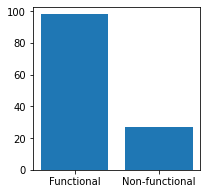

In [8]:
F = (131)
NF = (91)

data = {'Functional': 98, 'Non-functional': 27}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 1, figsize=(3, 3), sharey=True)
axs.bar(names, values)

#fig.suptitle('Statistics of requirements by functional & non-functional')
plt.show()

In [9]:
# Thống kê các word xuất hiện ở tất cả các nhãn
total_label = 18
vocab = {}
label_vocab = {}
for line in open('dataset.txt'):
    words = line.split()
    # lưu ý từ đầu tiên là nhãn
    label = words[0]
    if label not in label_vocab:
        label_vocab[label] = {}
    for word in words[1:]:
        label_vocab[label][word] = label_vocab[label].get(word, 0) + 1
        if word not in vocab:
            vocab[word] = set()
        vocab[word].add(label)

count = {}
for word in vocab:
    if len(vocab[word]) == total_label:
        count[word] = min([label_vocab[x][word] for x in label_vocab])
        
sorted_count = sorted(count, key=count.get, reverse=True)
for word in sorted_count[:100]:
    print(word, count[word])

In [10]:
# loại stopword khỏi dữ liệu
# lưu file dùng về sau
stopword = set()
with open('stopwords.txt', 'w') as fp:
    for word in sorted_count[:100]:
        stopword.add(word)
        fp.write(word + '\n')
    
def remove_stopwords(line):
    words = []
    for word in line.strip().split():
        if word not in stopword:
            words.append(word)
    return ' '.join(words)
    
    
with open('dataset.prep', 'w') as fp:
    for line in open('dataset.txt'):
        line = remove_stopwords(line)
        fp.write(line + '\n')

In [12]:
# Chia tập train/test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
test_percent = 0.2

text = []
label = []

for line in open('dataset.prep'):
    words = line.strip().split()
    label.append(words[0])
    text.append(' '.join(words[1:]))

X_train, X_test, y_train, y_test = train_test_split(text, label, test_size=test_percent, random_state=42)

# Lưu train/test data
# Giữ nguyên train/test để về sau so sánh các mô hình cho công bằng
with open('train.txt', 'w') as fp:
    for x, y in zip(X_train, y_train):
        fp.write('{} {}\n'.format(y, x))

with open('test.txt', 'w') as fp:
    for x, y in zip(X_test, y_test):
        fp.write('{} {}\n'.format(y, x))

# encode label
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print(list(label_encoder.classes_), '\n')
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

print(X_train[0], y_train[0], '\n')
print(X_test[0], y_test[0])

['__label__FR', '__label__NF'] 

Line Manager tạo Hướng dẫn công việc trên hệ thống 0 

Sản phẩm sẽ sử dụng menu điều hướng tiêu chuẩn quen thuộc với hầu hết người dùng web. 1


In [13]:
MODEL_PATH = "models"

import os
if not os.path.exists(MODEL_PATH):
    os.makedirs(MODEL_PATH)

### Naive Bayes

In [14]:
import pickle
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

start_time = time.time()
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,1),
                                             max_df=0.8,
                                             max_features=None)), 
                     ('tfidf', TfidfTransformer()), 
                     ('clf', MultinomialNB())
                    ])
text_clf = text_clf.fit(X_train, y_train)

train_time = time.time() - start_time
print('Done training Naive Bayes in', train_time, 'seconds.')

# Save model
pickle.dump(text_clf, open(os.path.join(MODEL_PATH, "naive_bayes.pkl"), 'wb'))

Done training Naive Bayes in 0.017238616943359375 seconds.


### Logistics Regression Classifier

In [15]:
from sklearn.linear_model import LogisticRegression
    
start_time = time.time()
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,1),
                                             max_df=0.8,
                                             max_features=None)), 
                     ('tfidf', TfidfTransformer()),
                     ('clf', LogisticRegression(solver='lbfgs', 
                                                multi_class='auto',
                                                max_iter=10000))
                    ])
text_clf = text_clf.fit(X_train, y_train)

train_time = time.time() - start_time
print('Done training Linear Classifier in', train_time, 'seconds.')

# Save model
pickle.dump(text_clf, open(os.path.join(MODEL_PATH, "linear_classifier.pkl"), 'wb'))

Done training Linear Classifier in 0.02591538429260254 seconds.


### Support Vector Machine (SVM)

In [16]:
from sklearn.svm import SVC

start_time = time.time()
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,1),
                                             max_df=0.8,
                                             max_features=None)), 
                     ('tfidf', TfidfTransformer()),
                     ('clf', SVC(gamma='scale'))
                    ])
text_clf = text_clf.fit(X_train, y_train)

train_time = time.time() - start_time
print('Done training SVM in', train_time, 'seconds.')

# Save model
pickle.dump(text_clf, open(os.path.join(MODEL_PATH, "svm.pkl"), 'wb'))

Done training SVM in 0.01683640480041504 seconds.


### MLP

In [17]:
from sklearn.neural_network import MLPClassifier

In [18]:
start_time = time.time()
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,1),
                                             max_df=0.8,
                                             max_features=None)), 
                     ('tfidf', TfidfTransformer()),
                     ('clf', MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1))
                    ])

text_clf = text_clf.fit(X_train, y_train)
train_time = time.time() - start_time
print('Done training RNN in', train_time, 'seconds.')

# Save model
pickle.dump(text_clf, open(os.path.join(MODEL_PATH, "rnn.pkl"), 'wb'))

Done training RNN in 0.015318870544433594 seconds.


##Random forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
start_time = time.time()
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,1),
                                             max_df=0.8,
                                             max_features=None)), 
                     ('tfidf', TfidfTransformer()),
                     ('clf', RandomForestClassifier(max_depth=2, random_state=0))
                    ])

text_clf = text_clf.fit(X_train, y_train)
train_time = time.time() - start_time
print('Done training Random forest in', train_time, 'seconds.')

# Save model
pickle.dump(text_clf, open(os.path.join(MODEL_PATH, "ran.pkl"), 'wb'))

Done training Random forest in 0.14330506324768066 seconds.


### FastText

In [21]:
# Cài đặt fastText cho Python
!pip install pandas==1.1.5
!pip install wget==3.2
!pip install fasttext==0.9.2

     |████████████████████████████████| 9.5 MB 8.4 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=a24f3dfda32a03a83ffb6cdce6b7bebc6eb43e26bc12b6351f4a600973911885
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
     |████████████████████████████████| 68 kB 4.2 MB/s 
  Using cached pybind11-2.9.2-py2.py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3148732 sha256=b16e97a95027884f30b41b75aa585aed9428e5be238218cff0ee95022b0115f0
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [22]:
import fasttext

start_time = time.time()
model = fasttext.train_supervised(
                                input='train.txt',
                                dim=100,
                                epoch=5,
                                lr=0.1,
                                wordNgrams=2,
                                label='__label__',
                                minCount=5
)

train_time = time.time() - start_time
print('Done training Fasttext in', train_time, 'seconds.')

# Compress model files with quantization
model.quantize(input='train.txt', retrain=True)
model.save_model(os.path.join(MODEL_PATH,"fasttext.ftz"))

Done training Fasttext in 1.564793586730957 seconds.


## Đánh giá các mô hình

In [23]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [25]:
# Random forest
model = pickle.load(open(os.path.join(MODEL_PATH,"ran.pkl"), 'rb'))
y_pred = model.predict(X_test)
print('Random forest, Accuracy =', np.mean(y_pred == y_test))
print ('Random forest - precision:', precision_score(y_test, y_pred, average='macro'))
print ('Random forest - F1:', f1_score(y_test, y_pred, average='macro'))
print ('Random forest - recall:', recall_score(y_test, y_pred, average='macro'))

# Naive Bayes
model = pickle.load(open(os.path.join(MODEL_PATH,"naive_bayes.pkl"), 'rb'))
y_pred = model.predict(X_test)
print('Naive Bayes, Accuracy =', np.mean(y_pred == y_test))
print ('Naive - precision:', precision_score(y_test, y_pred, average='macro'))
print ('Naive - F1:', f1_score(y_test, y_pred, average='macro'))
print ('Naive - recall:', recall_score(y_test, y_pred, average='macro'))


# Linear Classifier
model = pickle.load(open(os.path.join(MODEL_PATH,"linear_classifier.pkl"), 'rb'))
y_pred = model.predict(X_test)
print('Logistics Classifier, Accuracy =', np.mean(y_pred == y_test))
print('Logistics - precision:', precision_score(y_test, y_pred, average='macro'))
print('Logis - F1:', f1_score(y_test, y_pred, average='macro'))
print ('LOgis - recall:', recall_score(y_test, y_pred, average='macro'))


# SVM
model = pickle.load(open(os.path.join(MODEL_PATH,"svm.pkl"), 'rb'))
y_pred = model.predict(X_test)
print('SVM, Accuracy =', np.mean(y_pred == y_test))
print('SVM - precision: ', precision_score(y_test, y_pred, average='macro'))
print('SVM - F1:', f1_score(y_test, y_pred, average='macro'))
print ('SVM - recall:', recall_score(y_test, y_pred, average='macro'))


# RNN
model = pickle.load(open(os.path.join(MODEL_PATH,"rnn.pkl"), 'rb'))
y_pred = model.predict(X_test)
print ('RNN, Accuracy =',np.mean(y_pred == y_test))
print('RNN- precision:', precision_score(y_test, y_pred, average='macro'))
print ('RNN - F1:', f1_score(y_test, y_pred, average='macro'))
print ('RNN - recall:', recall_score(y_test, y_pred, average='macro'))


# Fasttext
def print_results(N, p, r):
    print("Fasttext, Precision = {}, Recall = {}".format(p, r))
    
model = fasttext.load_model(os.path.join(MODEL_PATH,"fasttext.ftz"))
print_results(*model.test('test.txt'))

Random forest, Accuracy = 0.7555555555555555
Random forest - precision: 0.8071428571428572
Random forest - F1: 0.7201808931599774
Random forest - recall: 0.7176113360323887
Naive Bayes, Accuracy = 0.9333333333333333
Naive - precision: 0.9299999999999999
Naive - F1: 0.9321266968325792
Naive - recall: 0.9352226720647774
Logistics Classifier, Accuracy = 0.9111111111111111
Logistics - precision: 0.9077380952380952
Logis - F1: 0.9099999999999999
LOgis - recall: 0.915991902834008
SVM, Accuracy = 0.8888888888888888
SVM - precision:  0.8958333333333333
SVM - F1: 0.8886689757545769
SVM - recall: 0.9038461538461539
RNN, Accuracy = 0.5777777777777777
RNN- precision: 0.28888888888888886
RNN - F1: 0.3661971830985915
RNN - recall: 0.5
Fasttext, Precision = 0.7555555555555555, Recall = 0.7555555555555555


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

 __label__FR       0.86      1.00      0.93        19
 __label__NF       1.00      0.50      0.67         6

    accuracy                           0.88        25
   macro avg       0.93      0.75      0.80        25
weighted avg       0.90      0.88      0.86        25



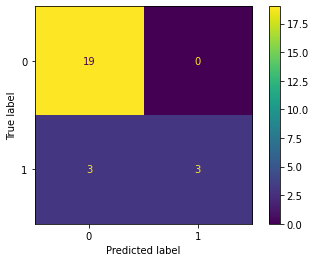

In [ ]:
# Xem kết quả trên từng nhãn
from sklearn.metrics import classification_report

nb_model = pickle.load(open(os.path.join(MODEL_PATH,"naive_bayes.pkl"), 'rb'))
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=list(label_encoder.classes_)))

cm = confusion_matrix(y_test, y_pred, labels=nb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
disp.plot()
plt.show()

In [ ]:
# xem kết quả cho 1 văn bản model naive bayes đã load ở trên

document = "Phần mềm ứng dụng phải đầy đủ các chức năng cập nhật, điều chỉnh, hủy bỏ, tra cứu, thống kê, tìm kiếm theo các dữ liệu đã được thiết lập"

document = text_preprocess(document)
document = remove_stopwords(document)

label = nb_model.predict([document])
print('Predict label:', label_encoder.inverse_transform(label))

NameError: ignored